# Scene Classification
## 5. Predict
- Import pkg
- Extract zip file
- Preview "scene_classes.csv"
- Preview "scene_{0}_annotations_20170904.json"
- Test the image and pickle function
- Split data into serval pickle file

This part need jupyter notebook start with "jupyter notebook --NotebookApp.iopub_data_rate_limit=1000000000" (https://github.com/jupyter/notebook/issues/2287)

Reference:
- https://challenger.ai/competitions
- https://github.com/jupyter/notebook/issues/2287

### Import pkg

In [1]:
import numpy as np
import pandas as pd
# import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [16]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard

In [3]:
# import zipfile
import os
import zipfile
import math
from time import time
from IPython.display import display
import pdb
import json
from PIL import Image
import glob
import pickle

### Extract zip file

In [9]:
input_path = './input'
datasetName = 'validation'
date = '20170908'

zip_path = input_path + '/ai_challenger_scene_{0}_{1}.zip'.format(datasetName, date)
extract_path = input_path + '/ai_challenger_scene_{0}_{1}'.format(datasetName, date)
image_path = extract_path + '/scene_{0}_images_{1}'.format(datasetName, date)
scene_classes_path = extract_path + '/scene_classes.csv'
scene_annotations_path = extract_path + '/scene_{0}_annotations_{1}.json'.format(datasetName, date)

print(input_path)
print(zip_path)
print(extract_path)
print(image_path)
print(scene_classes_path)
print(scene_annotations_path)

./input
./input/ai_challenger_scene_validation_20170908.zip
./input/ai_challenger_scene_validation_20170908
./input/ai_challenger_scene_validation_20170908/scene_validation_images_20170908
./input/ai_challenger_scene_validation_20170908/scene_classes.csv
./input/ai_challenger_scene_validation_20170908/scene_validation_annotations_20170908.json


In [10]:
if not os.path.isdir(extract_path):
    with zipfile.ZipFile(zip_path) as file:
        for name in file.namelist():
            file.extract(name, input_path)

### Preview "scene_classes.csv"

In [11]:
scene_classes = pd.read_csv(scene_classes_path, header=None)
display(scene_classes.head())

,0,1,2
0,0,航站楼,airport_terminal
1,1,停机坪,landing_field
2,2,机舱,airplane_cabin
3,3,游乐场,amusement_park
4,4,冰场,skating_rink


### Preview "scene_{0}_annotations_20170904.json"

**This part need jupyter notebook start with "jupyter notebook --NotebookApp.iopub_data_rate_limit=1000000000"**
https://github.com/jupyter/notebook/issues/2287

In [12]:
with open(scene_annotations_path, 'r', encoding='utf-8') as file:
    content = ''
    for line in file:
        content = content + line
scene_annotations = json.loads(content)

In [13]:
#We get a list
print('scene_{0}_annotations.type: %{1}'.format(datasetName, type(scene_annotations)))
print('scene_{0}_annotations.shape: %{1}'.format(datasetName, len(scene_annotations)))
order = 0
print(scene_annotations[order])
print('label_id[{0}]:\t{1}'.format(order, scene_annotations[order]['label_id']))
print('image_id[{0}]:\t{1}'.format(order, scene_annotations[order]['image_id']))

scene_validation_annotations.type: %<class 'list'>
scene_validation_annotations.shape: %7120
{'image_id': '0c58107693263d32551209512d858246e925fe29.jpg', 'image_url': 'http://m4.biz.itc.cn/pic/new/n/31/90/Img7919031_n.jpg', 'label_id': '18'}
label_id[0]:	18
image_id[0]:	0c58107693263d32551209512d858246e925fe29.jpg


### Load model

In [17]:
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
# from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.inception_v3 import InceptionV3

In [19]:
model = load_model('./model/TopLayer2017-09-23_12-53-59.h5')

### Predict

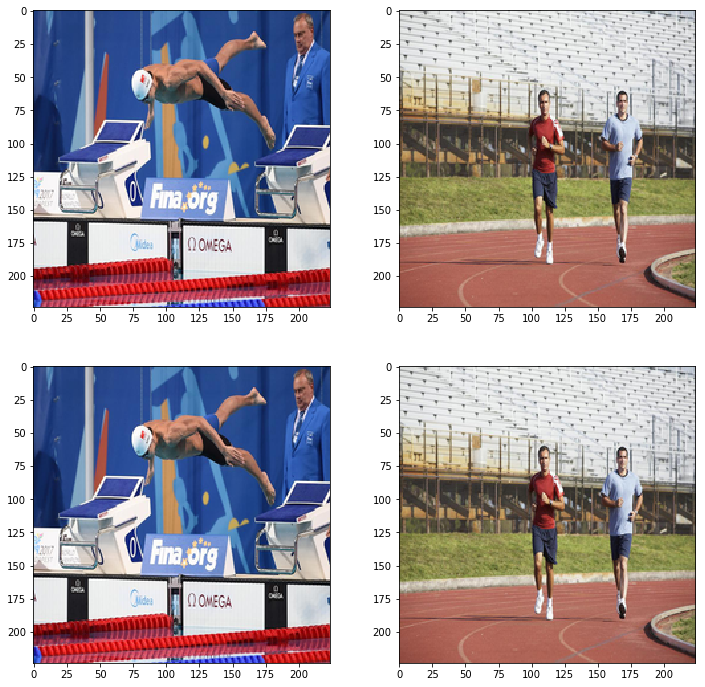

In [22]:
# length = len(scene_annotations)
length = 2
box = (224, 224)
x_shape = [length, box[0], box[1], 3]
x_data = np.zeros(x_shape)
y_data = np.zeros(length)

fig, ax = plt.subplots(2, length, figsize=(12, 12))

for i in range(length):
#     y_data[i] = scene_annotations[i]['label_id']
    path = image_path + '/' + scene_annotations[i]['image_id']
    img = Image.open(path)
    img1 = img.resize(box, Image.ANTIALIAS) # resizes image in-place
    imgData = np.asarray(img1)
    ax[0][i].imshow(imgData)
    imgData = imgData.astype("float32")
    imgData = imgData/255.0
    ax[1][i].imshow(imgData)
#     x_data[i] = imgData
#     ax[2][i].imshow(x_data[i])

In [37]:
print('Done!')

Done!
